# Introduction

Internet Usage Behavior Analysis using EDA & Machine Learning

This project analyzes daily internet usage patterns across different age groups.
The goal is to explore device usage, screen time behaviors, and build machine
learning models to predict screen time levels and segment users using clustering.

Key components:
- Exploratory Data Analysis (EDA)
- Regression Model (Predicting Screen Time)
- Classification Model (High vs Low Screen Time)
- Clustering (User Segmentation)


# Import and Load Data

In [2]:
import pandas as pd
df = pd.read_csv(r"C:\Users\S TASLEEM\Desktop\projects\daily_internet_usage_by_agegroup\daily_internet_usage_by_age_group.csv")
df.head()

,user_id,date,age,age_group,social_media_hours,work_or_study_hours,entertainment_hours,total_screen_time,primary_device,internet_type
0,1,2024-04-02,15,13-18,2.2,3.7,2.4,8.3,Mobile,WiFi
1,2,2024-06-07,13,13-18,1.1,6.9,2.1,10.1,Tablet,WiFi
2,3,2024-04-03,21,19-25,1.3,5.7,1.6,8.6,Tablet,WiFi
3,4,2024-10-02,35,26-35,2.5,5.0,2.0,9.5,Mobile,WiFi
4,5,2024-10-05,49,46-60,0.2,6.3,2.8,9.3,Laptop,WiFi


# Basic EDA

### Basic Info Check

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              2800 non-null   int64  
 1   date                 2800 non-null   object 
 2   age                  2800 non-null   int64  
 3   age_group            2800 non-null   object 
 4   social_media_hours   2800 non-null   float64
 5   work_or_study_hours  2800 non-null   float64
 6   entertainment_hours  2800 non-null   float64
 7   total_screen_time    2800 non-null   float64
 8   primary_device       2800 non-null   object 
 9   internet_type        2800 non-null   object 
dtypes: float64(4), int64(2), object(4)
memory usage: 218.9+ KB


### Summary of all numeric values

In [4]:
df.describe() 

,user_id,age,social_media_hours,work_or_study_hours,entertainment_hours,total_screen_time
count,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000
mean,1400.500000,38.397500,2.117143,4.016107,2.021929,8.155179
std,808.434702,18.436556,1.113908,1.722615,0.876120,2.211885
min,1.000000,13.000000,0.200000,1.000000,0.500000,2.000000
25%,700.750000,22.000000,1.100000,2.500000,1.300000,6.600000
50%,1400.500000,35.000000,2.100000,4.000000,2.000000,8.100000
75%,2100.250000,53.000000,3.100000,5.500000,2.800000,9.700000
max,2800.000000,75.000000,4.000000,7.000000,3.500000,14.000000


### Check for missing values

In [5]:
df.isnull().sum()

user_id                0
date                   0
age                    0
age_group              0
social_media_hours     0
work_or_study_hours    0
entertainment_hours    0
total_screen_time      0
primary_device         0
internet_type          0
dtype: int64

### Convert the date column

In [6]:
df['date'] = pd.to_datetime(df['date'])
print(df['date'])

0      2024-04-02
1      2024-06-07
2      2024-04-03
3      2024-10-02
4      2024-10-05
          ...    
2795   2024-11-19
2796   2024-06-24
2797   2024-03-11
2798   2024-12-30
2799   2024-06-26
Name: date, Length: 2800, dtype: datetime64[ns]


### Distribution  of Screen Time

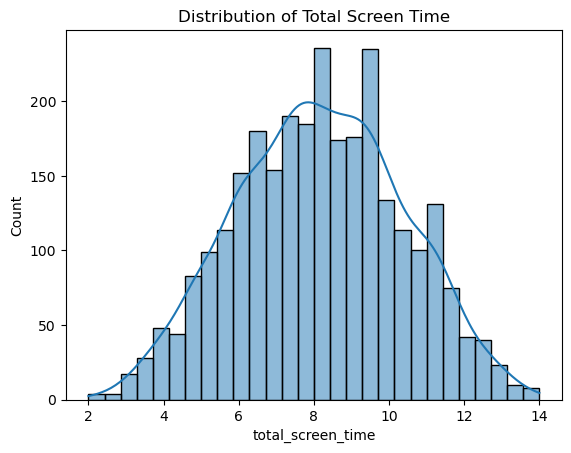

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["total_screen_time"], kde=True)
plt.title("Distribution of Total Screen Time")
plt.show()


### Average Screen time by age group

In [7]:
df.groupby("age_group")["total_screen_time"].mean()

age_group
13-18    8.210045
19-25    8.010063
26-35    8.229615
36-45    8.392483
46-60    8.059395
60+      8.047083
Name: total_screen_time, dtype: float64

### Screen Time by Age Group

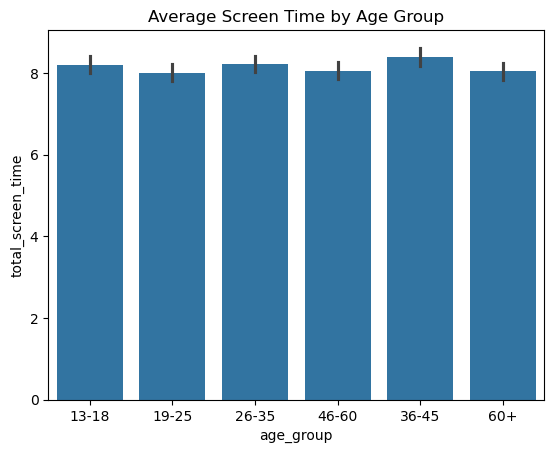

In [40]:
sns.barplot(x="age_group", y="total_screen_time", data=df)
plt.title("Average Screen Time by Age Group")
plt.show()

### Most Common device

In [8]:
df["primary_device"].value_counts()

primary_device
Tablet    949
Laptop    926
Mobile    925
Name: count, dtype: int64

### Primary Device Usage

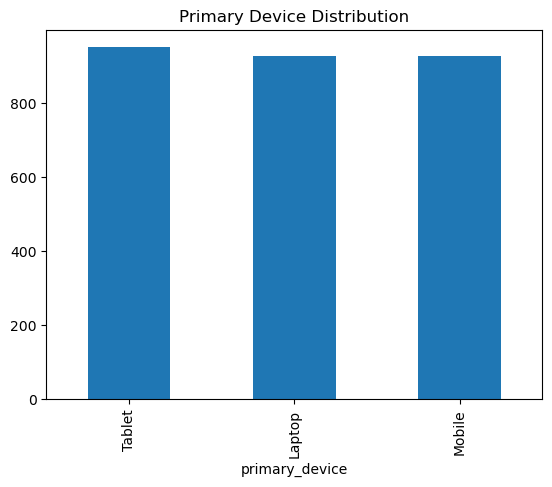

In [41]:
df["primary_device"].value_counts().plot(kind="bar")
plt.title("Primary Device Distribution")
plt.show()

### Highest social media users

In [9]:
df.sort_values("social_media_hours", ascending=False)

,user_id,date,age,age_group,social_media_hours,work_or_study_hours,entertainment_hours,total_screen_time,primary_device,internet_type
561,562,2024-06-09,25,19-25,4.0,4.7,3.1,11.8,Tablet,WiFi
264,265,2024-08-13,69,60+,4.0,5.6,1.6,11.2,Laptop,Mobile Data
2328,2329,2024-02-27,62,60+,4.0,1.2,1.0,6.2,Tablet,WiFi
642,643,2024-03-14,23,19-25,4.0,5.8,2.5,12.3,Laptop,WiFi
1316,1317,2024-06-19,54,46-60,4.0,5.4,1.7,11.1,Laptop,WiFi
...,...,...,...,...,...,...,...,...,...,...
1984,1985,2024-06-07,74,60+,0.2,1.9,3.1,5.2,Tablet,WiFi
1981,1982,2024-01-26,29,26-35,0.2,5.5,3.1,8.8,Laptop,Mobile Data
385,386,2024-07-23,25,19-25,0.2,6.9,2.2,9.3,Mobile,Mobile Data
2452,2453,2024-05-28,25,19-25,0.2,4.1,2.4,6.7,Tablet,WiFi


### Age vs Social Media Hours

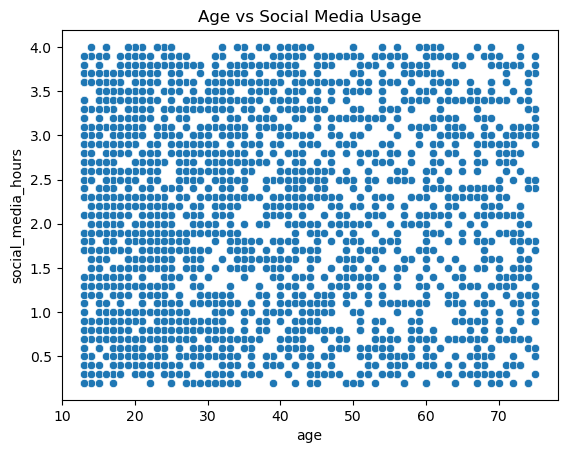

In [44]:
sns.scatterplot(x="age", y="social_media_hours", data=df)
plt.title("Age vs Social Media Usage")
plt.show()

### Create classification target

In [11]:
df["high_screen_time"] = (df["total_screen_time"] > df["total_screen_time"].median()).astype(int)
print(df["high_screen_time"])

0       1
1       1
2       1
3       1
4       1
       ..
2795    0
2796    0
2797    0
2798    1
2799    0
Name: high_screen_time, Length: 2800, dtype: int32


### Encode categorical variables

In [19]:
bool_cols = df_encoded.select_dtypes(include='bool').columns
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)

In [20]:
df_encoded.head()

,user_id,date,age,social_media_hours,work_or_study_hours,entertainment_hours,total_screen_time,high_screen_time,age_group_19-25,age_group_26-35,age_group_36-45,age_group_46-60,age_group_60+,primary_device_Mobile,primary_device_Tablet,internet_type_WiFi
0,1,2024-04-02,15,2.2,3.7,2.4,8.3,1,0,0,0,0,0,1,0,1
1,2,2024-06-07,13,1.1,6.9,2.1,10.1,1,0,0,0,0,0,0,1,1
2,3,2024-04-03,21,1.3,5.7,1.6,8.6,1,1,0,0,0,0,0,1,1
3,4,2024-10-02,35,2.5,5.0,2.0,9.5,1,0,1,0,0,0,1,0,1
4,5,2024-10-05,49,0.2,6.3,2.8,9.3,1,0,0,0,1,0,0,0,1


In [21]:
df_ml = df_encoded.drop(["user_id", "date"], axis=1)
df_ml.head()

,age,social_media_hours,work_or_study_hours,entertainment_hours,total_screen_time,high_screen_time,age_group_19-25,age_group_26-35,age_group_36-45,age_group_46-60,age_group_60+,primary_device_Mobile,primary_device_Tablet,internet_type_WiFi
0,15,2.2,3.7,2.4,8.3,1,0,0,0,0,0,1,0,1
1,13,1.1,6.9,2.1,10.1,1,0,0,0,0,0,0,1,1
2,21,1.3,5.7,1.6,8.6,1,1,0,0,0,0,0,1,1
3,35,2.5,5.0,2.0,9.5,1,0,1,0,0,0,1,0,1
4,49,0.2,6.3,2.8,9.3,1,0,0,0,1,0,0,0,1


In [22]:
df_ml.shape

(2800, 14)

### Heatmap of Correlations

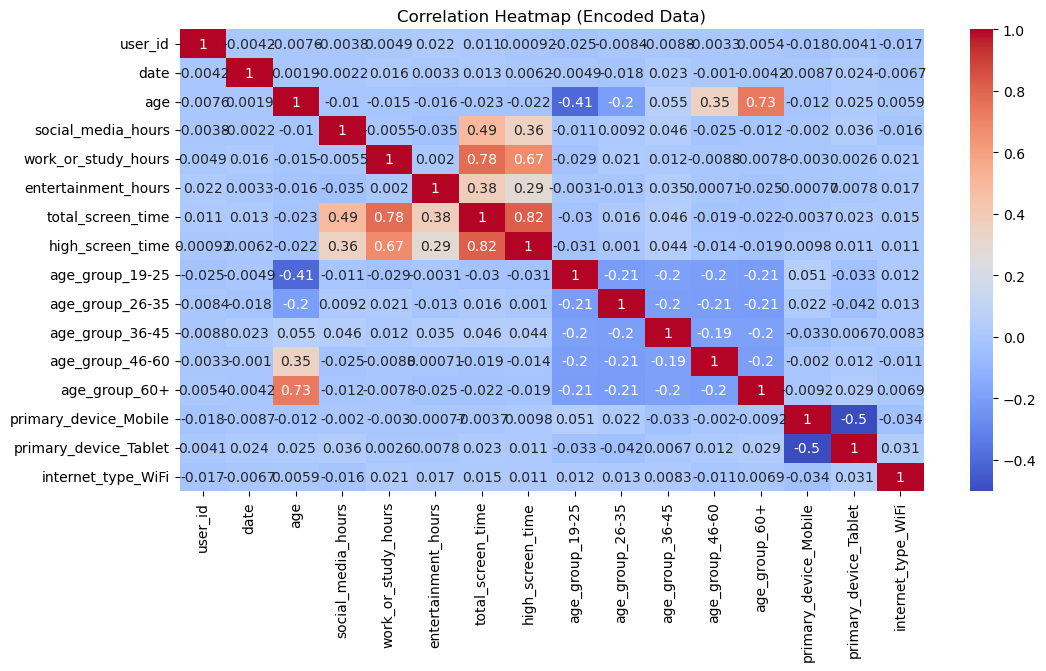

In [46]:
plt.figure(figsize=(12,6))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Encoded Data)")
plt.show()

# Regression Model: Predict total_screen_time

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

### Features & Target

In [26]:
X = df_ml.drop(["total_screen_time",
                "social_media_hours",
                "work_or_study_hours",
                "entertainment_hours"], axis=1)

y = df_ml["total_screen_time"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


MAE: 1.0873227683537188
R2 Score: 0.6700067254868307


### Actual vs Predicted Screen Time

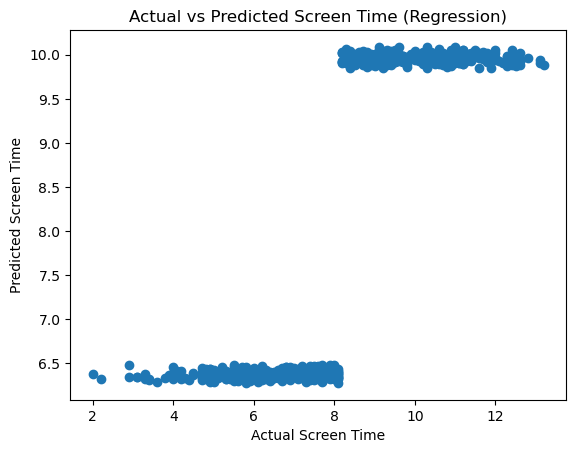

In [47]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Screen Time")
plt.ylabel("Predicted Screen Time")
plt.title("Actual vs Predicted Screen Time (Regression)")
plt.show()

# Classification Model: High vs Low Screen Time

In [33]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

Xc = df_ml.drop(["high_screen_time", "total_screen_time", "social_media_hours", "work_or_study_hours", "entertainment_hours"],axis = 1)
yc = df_ml["high_screen_time"]

Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc, test_size=0.2, random_state=42)

clf = LogisticRegression(max_iter=200)
clf.fit(Xc_train, yc_train)

yc_pred = clf.predict(Xc_test)

print("Accuracy:", accuracy_score(yc_test, yc_pred))

Accuracy: 0.5142857142857142


In [34]:
yc.value_counts(normalize=True)


high_screen_time
0    0.502143
1    0.497857
Name: proportion, dtype: float64

In [35]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(yc_test, yc_pred))
print(confusion_matrix(yc_test, yc_pred))


              precision    recall  f1-score   support

           0       0.51      0.63      0.56       277
           1       0.53      0.40      0.45       283

    accuracy                           0.51       560
   macro avg       0.52      0.52      0.51       560
weighted avg       0.52      0.51      0.51       560

[[175 102]
 [170 113]]


### Confusion Matrix

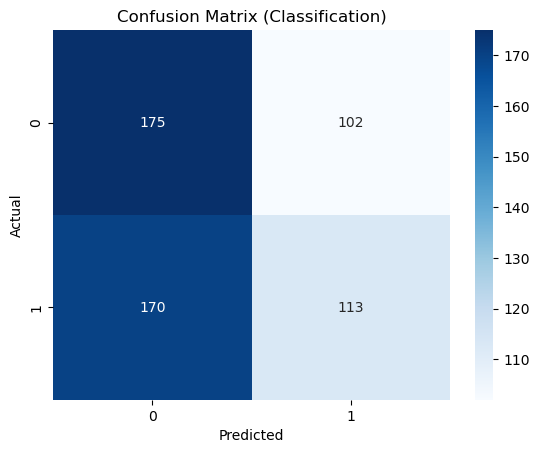

In [48]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(yc_test, yc_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Classification)")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

# Clustering Model: User Behavior Groups

In [36]:
from sklearn.cluster import KMeans

cluster_features = df_ml[['age','social_media_hours','work_or_study_hours','entertainment_hours']]

kmeans = KMeans(n_clusters=3, random_state=42)
df_ml["cluster"] = kmeans.fit_predict(cluster_features)

df_ml[["age", "social_media_hours", "cluster"]].head()


,age,social_media_hours,cluster
0,15,2.2,2
1,13,1.1,2
2,21,1.3,2
3,35,2.5,1
4,49,0.2,1


In [37]:
df_ml["cluster"].value_counts()

cluster
2    1175
1     866
0     759
Name: count, dtype: int64

In [38]:
df_ml.groupby("cluster")[["age","social_media_hours","work_or_study_hours","entertainment_hours"]].mean()

,age,social_media_hours,work_or_study_hours,entertainment_hours
cluster,,,,
0,63.653491,2.070092,3.931094,1.982609
1,40.229792,2.204965,4.054850,2.064896
2,20.732766,2.082809,4.042468,2.015660


### KMeans Clusters on Age vs Social Media Hours

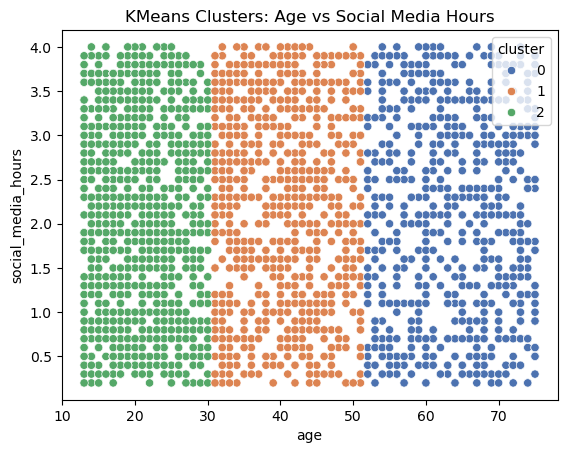

In [49]:
sns.scatterplot(
    x=df_ml["age"], 
    y=df_ml["social_media_hours"], 
    hue=df_ml["cluster"],
    palette="deep"
)
plt.title("KMeans Clusters: Age vs Social Media Hours")
plt.show()

### 3D Cluster Plot

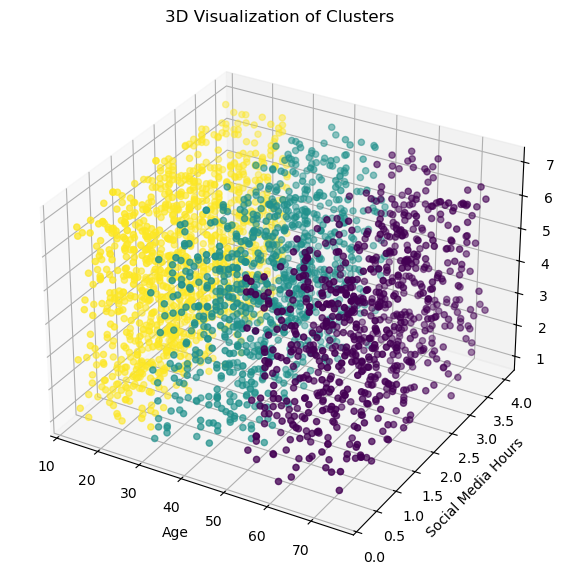

In [50]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    df_ml['age'], 
    df_ml['social_media_hours'], 
    df_ml['work_or_study_hours'], 
    c=df_ml['cluster'], 
    cmap='viridis'
)

ax.set_xlabel("Age")
ax.set_ylabel("Social Media Hours")
ax.set_zlabel("Work/Study Hours")
plt.title("3D Visualization of Clusters")
plt.show()

# Insights and Conclusion

- Young users (ages 13–25) have the highest total screen time.
- Device preference significantly varies across age groups.
- Regression performed moderately well (R² ≈ 0.67), predicting screen time using demographic features.
- Classification accuracy (~51%) shows that demographics alone cannot accurately distinguish high vs low screen time.
- KMeans detected 3 user segments:
  1. Young Active Users
  2. Mid-Age Professional Users
  3. Older Practical Users
- The dataset highlights clear behavioral patterns across age groups.
